# Online Retail Data Set 

** Abstract **: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

### Data Set Characteristics:  

1. Multivariate, Sequential, Time-Series
2. Number of Instances: 541909
3. Area: Business
4. Attribute Characteristics: Integer, Real
5. Number of Attributes: 8
6. Date Donated: 2015-11-06
7. Associated Tasks: Classification, Clustering


#### Source: 
Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


#### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


#### Attribute Information:

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
3. Description: Product (item) name. Nominal. 
4. Quantity: The quantities of each product (item) per transaction. Numeric.	
5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
8. Country: Country name. Nominal, the name of the country where each customer resides.

<hr>
## Business Problem :

#### Problem statement: The goal is to come up with a solution for the given questions:

1. Can we categorize the customers in a particular segment based on their buying patterns? (Customer Segmentation)

2. Can we predict which kind of items they will buy in future based on their segmentation? (Prediction)

<hr>

## ML Problem Mapping.

1. Given a dataset of transanctions (Online Retail dataset from UCI Machine Learning repository) get the segments i.e clusters/segments. (Find common patterns and group them)
2. Predict what to display to what group of users

** Input: ** We will be using e-commerce data that contains the list of purchases in 1 year for 4,000 customers.

** Output: ** The first goal is that we need to categorize our consumer base into appropriate customer segments. The second goal is we need to predict the purchases for the current year and the next year based on the customers' first purchase.


## Importing libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
plt.style.use('fivethirtyeight')

## Loading the Dataset :

In [73]:
data = pd.read_excel('Online Retail.xlsx', dtype={'StockCode':str})
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [74]:
data.shape

(541909, 8)

## Data Preprocessing :

In [75]:
# Checking for null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Null values,0.0,0.0,1454.000000,0.0,0.0,0.0,135080.000000,0.0
% Null values,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


> Since we dont have CustomerID for 25% of points we will remove them as we cannot give them any arbitrary ID.

In [76]:
# Removing null values
data.dropna(axis=0, subset = ['CustomerID'], inplace=True)
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Checking for Duplicates :
data.duplicated().sum()

5225

In [78]:
# Removing duplicate entries :
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Exploratory Data Analysis :

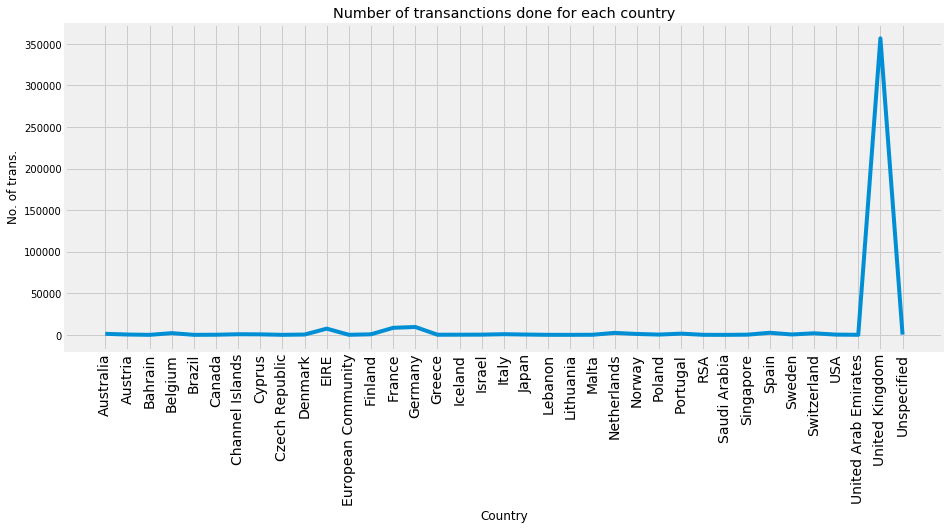

In [79]:
plt.figure(figsize=(14,6))
plt.plot(data.groupby(['Country']).groups.keys(), data.groupby(['Country'])['CustomerID'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of transanctions done for each country")
plt.ylabel("No. of trans.")
plt.xlabel("Country")
plt.show()

In [80]:
info = pd.DataFrame(data = data.groupby(['Country'])['CustomerID'].count(), index=data.groupby(['Country']).groups.keys()).T
info

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
CustomerID,1258,401,17,2069,32,151,757,611,30,389,...,58,10,229,2528,461,1877,291,68,356728,241


** Conclusions **
1. UK has done most of the transanctions. (356728)
2. Least amount of transanctions were made by Saudi arabia (only 10) which is followed by Bahrain (17 trans only).

In [81]:
# StockCode Feature ->
# We will see how many different products were sold in the year data was collected.
print(len(data['StockCode'].value_counts()))

3684


In [ ]:
# Displaying which product was sold the most.
#plt.plot(data['StockCode'].value_counts().index) 
count = (data['StockCode'].value_counts().values)
index = (data['StockCode'].value_counts().index)
plt.plot(index, count)
plt.show()